CG
Input: $x_0$, $r_0 = Ax_0-b$, $p_0 = -r_0$

For k = 0,1,2
    $\alpha_k = -\frac{r_k^Tp_k}{p_k^TAp_k}$
    $x_{k+1} = x_k +\alpha_k p_k$
    $r_{k+1} = r_k +\alpha_k A p_k$
    $\beta_{k+1} = \frac{r_{k+1}Ap_k}{p_kAp_k}$
    $p_{k+1}= -r_{k+1} + \beta_{k+1}p_{k}$

In [1]:
import numpy as np 
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt






def conj_grad(A,b,x0,verbose=True):
    r0 = A@x0 -b
    p0 = -r0
    r = r0
    p = p0
    x=x0
    eps = 1e-12
    if verbose:
        res = []
        res.append(np.linalg.norm(r))
    k = 1
    while np.linalg.norm(r)>eps:
        alpha = (r.T@r)/(p.T@A@p)
        x =x+ alpha*p
        rold = r
        r = r+ alpha*A@p
        if verbose:
            res.append(np.linalg.norm(r))
        beta = (r.T@r)/(rold.T@rold)
        p = -r + beta*p

    if verbose:
        return x,res

    return x

def conj_grad_prec(A,b,x0,M=None,verbose=False):
    r0 = A@x0 -b
    y0 = sp.linalg.spsolve(M,r0)

    p0 = -y0
    r = r0
    p = p0
    x=x0
    y=y0
    eps = 1e-12
    if verbose:
        res = []
        res.append(np.linalg.norm(r))
    while np.linalg.norm(r)>eps:
        # alpha = -(r.T@p)/(p.T@A@p)
        alpha = (r.T@y)/(p.T@A@p)
        x =x+ alpha*p
        rold = r
        yold = y
        r = r+ alpha*A@p
        if verbose:
            res.append(np.linalg.norm(r))
        y = sp.linalg.spsolve(M,r)
        beta = (r.T@y)/(rold.T@yold)
        p = -y + beta*p
    if verbose:
        return x,res

    return x

In [2]:
import numpy as np

# Load the data
solution = np.loadtxt('solution.csv', delimiter=',')
A = np.loadtxt('A_matrix.csv', delimiter=',')
b = np.loadtxt('b_vector.csv', delimiter=',')
A = sp.csc_matrix(A)

# Display the data
print('Solution:', solution)
print('A Matrix:', A)
print('b Vector:', b)

Solution: [0.         0.00632911 0.01265823 0.01898734 0.02531646 0.05696203
 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.         0.         0.31012658 0.30379747
 0.03164557 0.05063291 0.06962025 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.06329114 0.06329114 0.         0.
 0.3164557  0.29746835 0.03797468 0.0443038  0.07594937 0.06329114
 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.         0.         0.32278481 0.29113924 0.28481013 0.0443038
 0.08227848 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114 0.06329114
 0.06329114 0.06329114 0.         0.         0.32911392 0.26582278
 0.27848101 0.0443038  0.08860759 0.09493671 0.06329114 0.120

In [3]:
cg_solution,cg_residuals = conj_grad(A,b,np.zeros(b.shape),verbose=True)

In [4]:
# def ichol(A):
#     A = sp.csc_matrix(A)
#     ilu = sp.linalg.spilu(A, drop_tol=1e-12, fill_factor=4.0)
#     return ilu.L



# C = ichol(A)
# M = C@C.T
C = np.loadtxt('prec.csv', delimiter=',')
M=C@C.T
M=sp.csc_matrix(M)

cgp_solution,cgp_residuals = conj_grad_prec(A,b,np.zeros(b.shape),M=M,verbose=True)

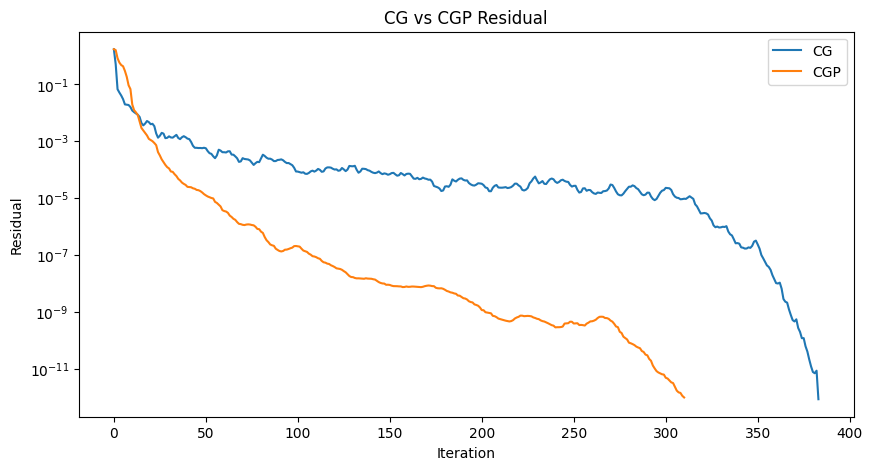

In [5]:
plt.figure(figsize=(10,5))
plt.plot(cg_residuals)
plt.plot(cgp_residuals)

plt.yscale('log')
plt.legend(['CG','CGP'])
plt.ylabel('Residual')
plt.xlabel('Iteration')
plt.title('CG vs CGP Residual')
plt.show()